<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Práctico:-Recomendación-de-Artistas" data-toc-modified-id="Práctico:-Recomendación-de-Artistas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Práctico: Recomendación de Artistas</a></span><ul class="toc-item"><li><span><a href="#Actividades" data-toc-modified-id="Actividades-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Actividades</a></span></li><li><span><a href="#Ejercicio-1---Análisis-Exploratorio-de-Datos" data-toc-modified-id="Ejercicio-1---Análisis-Exploratorio-de-Datos-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ejercicio 1 - Análisis Exploratorio de Datos</a></span></li><li><span><a href="#Ejercicio-2---Sistema-de-Recomendación" data-toc-modified-id="Ejercicio-2---Sistema-de-Recomendación-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ejercicio 2 - Sistema de Recomendación</a></span><ul class="toc-item"><li><span><a href="#Ejercicio-2a---Filtrados-Colaborativos" data-toc-modified-id="Ejercicio-2a---Filtrados-Colaborativos-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Ejercicio 2a - Filtrados Colaborativos</a></span><ul class="toc-item"><li><span><a href="#Matriz-de-Usuario-Contenido" data-toc-modified-id="Matriz-de-Usuario-Contenido-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Matriz de Usuario-Contenido</a></span></li><li><span><a href="#Entrenamiento-del-algoritmo-de-recomendación" data-toc-modified-id="Entrenamiento-del-algoritmo-de-recomendación-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>Entrenamiento del algoritmo de recomendación</a></span></li><li><span><a href="#Sistema-de-recomendación:" data-toc-modified-id="Sistema-de-recomendación:-1.3.1.3"><span class="toc-item-num">1.3.1.3&nbsp;&nbsp;</span>Sistema de recomendación:</a></span></li></ul></li><li><span><a href="#Ejercicio-2b---Sistemas-de-Recomendación-Avanzados" data-toc-modified-id="Ejercicio-2b---Sistemas-de-Recomendación-Avanzados-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Ejercicio 2b - Sistemas de Recomendación Avanzados</a></span></li></ul></li></ul></li></ul></div>

# Práctico: Recomendación de Artistas

En este práctico trabajaremos con el conjuto de datos de [LastFM](https://grouplens.org/datasets/hetrec-2011/) para el desarrollo de un sistema de recomendación que, dado el nombre de un artista musical, devuelve una lista de artistas "similares".

Para el práctico utilizaremos el conjunto de datos de LastFM que consiguieron del [notebook de instalación](./instalacion.ipynb). Se recomienda leer el [Readme](http://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-readme.txt) de los datos para saber más sobre que información contiene cada archivo.

In [36]:
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from scipy.sparse import csr_matrix


In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

import os 

In [38]:
# Cambiar por el ../data/... no me andaba en notebook2 ni PC_escritorio, solución_directo por ruta para no perder tiempo
artists = pd.read_csv(r"C:\Users\CristianSalgado\OneDrive - Pi Data Strategy & Consulting\Desafio Pi\SISTEMAS DE RECOMENDACION\SistemasDeRecomendacion\practico\data\lastfm\artists.dat", sep="\t")
user_artist = pd.read_csv(r"C:\Users\CristianSalgado\OneDrive - Pi Data Strategy & Consulting\Desafio Pi\SISTEMAS DE RECOMENDACION\SistemasDeRecomendacion\practico\data\lastfm\user_artists.dat", sep="\t")
tags = pd.read_csv(r"C:\Users\CristianSalgado\OneDrive - Pi Data Strategy & Consulting\Desafio Pi\SISTEMAS DE RECOMENDACION\SistemasDeRecomendacion\practico\data\lastfm\tags.dat", sep="\t", encoding = 'unicode_escape', engine ='python')
user_friends = pd.read_csv(r"C:\Users\CristianSalgado\OneDrive - Pi Data Strategy & Consulting\Desafio Pi\SISTEMAS DE RECOMENDACION\SistemasDeRecomendacion\practico\data\lastfm\user_friends.dat", sep="\t", encoding = 'unicode_escape', engine ='python')
user_taggedartists = pd.read_csv(r"C:\Users\CristianSalgado\OneDrive - Pi Data Strategy & Consulting\Desafio Pi\SISTEMAS DE RECOMENDACION\SistemasDeRecomendacion\practico\data\lastfm\user_taggedartists.dat", sep="\t", encoding = 'unicode_escape', engine ='python')
user_taggedartists_timestamps = pd.read_csv(r"C:\Users\CristianSalgado\OneDrive - Pi Data Strategy & Consulting\Desafio Pi\SISTEMAS DE RECOMENDACION\SistemasDeRecomendacion\practico\data\lastfm\user_taggedartists_timestamps.dat", sep="\t")

In [39]:
#artist_data = pd.read_csv("../data/lastfmt/artists.dat", sep="\t")
artist_data = artists
artist_data.head()
#len(artist_data)

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [40]:
#user_artist_plays = pd.read_csv("../data/lastfm/user_artists.dat", sep="\t")
user_artist_plays = user_artist

user_artist_plays.head()
#len(user_artist_plays)

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [41]:
tags.sample(5)

,tagID,tagValue
600,607,dutch
3157,3227,bosnian metal
6203,6449,contemporary chamber music
3709,3781,female pop singer
2423,2469,radiohead


In [42]:
user_taggedartists.sample(5)
#len(user_taggedartists)

,userID,artistID,tagID,day,month,year
140645,1629,1132,409,1,6,2009
118067,1335,16452,33,1,8,2008
96017,1060,152,88,1,2,2008
36272,387,3710,102,1,2,2009
138529,1623,1196,1,1,9,2007


In [43]:
user_friends.sample(5)

,userID,friendID
18594,1476,1773
23562,1905,1486
15341,1191,1472
8654,636,236
7874,553,1741


In [44]:
user_taggedartists_timestamps

,userID,artistID,tagID,timestamp
0,2,52,13,1238536800000
1,2,52,15,1238536800000
2,2,52,18,1238536800000
3,2,52,21,1238536800000
4,2,52,41,1238536800000
...,...,...,...,...
186474,2100,16437,4,1277935200000
186475,2100,16437,292,1272664800000
186476,2100,16437,2087,1277935200000
186477,2100,16437,2801,1272664800000


## Actividades

El [Ejercicio 1](#Ejercicio-1---Análisis-Exploratorio-de-Datos) deberá ser realizado por quienes estén realizando cualquier parte de la materia.

El [Ejercicio 2](#Ejercicio-2---Sistema-de-Recomendación) variará de acuerdo a que parte de la materia estén realizando (quienes estén realizando la materia completa, en realidad pueden realizar ambas opciones si así lo desean).

De acuerdo a la parte de la materia que hagan, deberán realizar una de las siguientes actividades (pueden realizar ambas si así lo desean):

La idea del práctico es hacer un análisis muy sencillo del conjunto de datos y desarrollar dos sistemas de recomendación: 
1. El primero, más sencillo, utilizando [Surpr!se](http://surpriselib.com/), y a partir de los datos de LastFM, en especial del archivo `./data/lastfm/user_artists.dat`, generar un sistema de recomendación basado en filtros colaborativos.
2. En el segundo, deberán utilizar todos los datos ofrecidos en el dataset de LastFM para generar un sistema de filtrado colaborativo más complejo, deberá utilizar las técnicas aprendidas 

basado en filtrado colaborativo (usando Surpr!se), a partir de los datos existentes.

## Ejercicio 1 - Análisis Exploratorio de Datos

En esta primera parte deberán hacer un análisis exploratorio de los datos, aprovechando toda la información brindada por el conjunto. A partir de eso podrán tener mayor idea de qué tipo de datos estarán enfrentando (describe o hist).

Algunas preguntas para responder:
- ¿Cuáles son los artistas que fueron más escuchados?
- ¿Cómo es la distribución de cantidad de listens por user?
- ¿Es posible ver el género más escuchado?

In [45]:
user_artist_plays.head(1)

,userID,artistID,weight
0,2,51,13883


In [46]:
#df1 = artist_data.merge(user_artist_plays, left_on='id', right_on='userID' , how='inner')
#df1 =user_artist_plays.merge(artist_data, left_on='userID', right_on='id' , how='left')
df = pd.merge(
  artist_data, user_artist_plays,
  how="inner",
  left_on="id",
  right_on="artistID"
)
df = df.rename(columns={"weight": "playCount"})

In [47]:
#Get total observations
print(f"There are {df.shape[0]} observations in the dataset")


There are 92834 observations in the dataset


In [48]:
df.isnull().sum()  #nulos


id              0
name            0
url             0
pictureURL    445
userID          0
artistID        0
playCount       0
dtype: int64

In [49]:
df.dtypes #types


id             int64
name          object
url           object
pictureURL    object
userID         int64
artistID       int64
playCount      int64
dtype: object

In [50]:
print('Dataset shape: {}'.format(df.shape))
print('-Dataset examples-')
print(df.iloc[::10000, :])

Dataset shape: (92834, 7)
-Dataset examples-
          id                 name  \
0          1         MALICE MIZER   
10000    227          The Beatles   
20000    349   The Pussycat Dolls   
30000    562              The Who   
40000    959                Queen   
50000   1456    Far East Movement   
60000   2584           Rogue Wave   
70000   4463  Fernando & Sorocaba   
80000   8369   Faith and the Muse   
90000  15715           Agnes Obel   

                                                     url  \
0                  http://www.last.fm/music/MALICE+MIZER   
10000               http://www.last.fm/music/The+Beatles   
20000        http://www.last.fm/music/The+Pussycat+Dolls   
30000                   http://www.last.fm/music/The+Who   
40000                     http://www.last.fm/music/Queen   
50000         http://www.last.fm/music/Far+East+Movement   
60000                http://www.last.fm/music/Rogue+Wave   
70000  http://www.last.fm/music/Fernando%2B%2526%2BSo...   
80000  

In [51]:
n_ratings = len(df)
n_artist = df['artistID'].nunique()
n_users = df['userID'].nunique()

print(f"Numero de Listens: {n_ratings}")
print(f"Numero de Artistas únicos : {n_artist}")
print(f"Numero de Usuarios únicos : {n_users}")
print(f"Promedio de Listens por usuario : {round(n_ratings/n_users, 2)}")
print(f"Promedio de Listens por Artistas : {round(n_ratings/n_artist, 2)}")

Numero de Listens: 92834
Numero de Artistas únicos : 17632
Numero de Usuarios únicos : 1892
Promedio de Listens por usuario : 49.07
Promedio de Listens por Artistas : 5.27


In [52]:
### Artist Rank

In [53]:
artist_rank = df.groupby(['name']) \
  .agg({'userID' : 'count', 'playCount' : 'sum'}) \
  .rename(columns={"userID" : 'totalUniqueUsers', "playCount" : "totalArtistPlays"}) \
  .sort_values(['totalArtistPlays'], ascending=False)
artist_rank['avgUserPlays'] = artist_rank['totalArtistPlays'] / artist_rank['totalUniqueUsers']

In [54]:
df = df.join(artist_rank, on="name", how="inner") \
  .sort_values(['playCount'], ascending=False)

In [55]:
df.head(5)

,id,name,url,pictureURL,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,72,Depeche Mode,http://www.last.fm/music/Depeche+Mode,http://userserve-ak.last.fm/serve/252/75022.jpg,1642,72,352698,282,1301308,4614.567376
35843,792,Thalía,http://www.last.fm/music/Thal%C3%ADa,http://userserve-ak.last.fm/serve/252/40337541...,2071,792,324663,26,350035,13462.884615
27302,511,U2,http://www.last.fm/music/U2,http://userserve-ak.last.fm/serve/252/4404698.jpg,1094,511,320725,185,493024,2664.994595
8152,203,Blur,http://www.last.fm/music/Blur,http://userserve-ak.last.fm/serve/252/269394.jpg,1905,203,257978,114,318221,2791.412281
26670,498,Paramore,http://www.last.fm/music/Paramore,http://userserve-ak.last.fm/serve/252/35837991...,1664,498,227829,399,963449,2414.659148


In [56]:
df = df.drop(columns=['url', 'pictureURL','id',])
df.head()

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,Thalía,2071,792,324663,26,350035,13462.884615
27302,U2,1094,511,320725,185,493024,2664.994595
8152,Blur,1905,203,257978,114,318221,2791.412281
26670,Paramore,1664,498,227829,399,963449,2414.659148


In [57]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 5)
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))))

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12) 

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right')

    plt.xticks(rotation=90)
    plt.show()

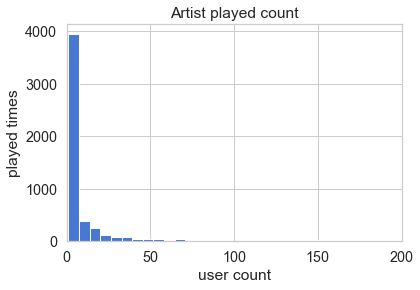

In [58]:
ax = df.playCount.value_counts().hist(bins=100)
ax.set_xlim((0, 200))
ax.set_title("Artist played count")
ax.set_xlabel("user count")
ax.set_ylabel("played times");

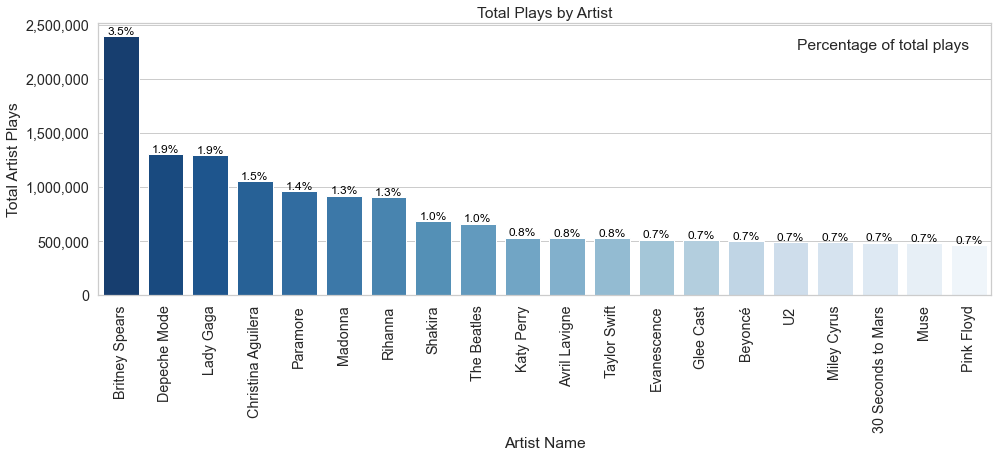

In [59]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

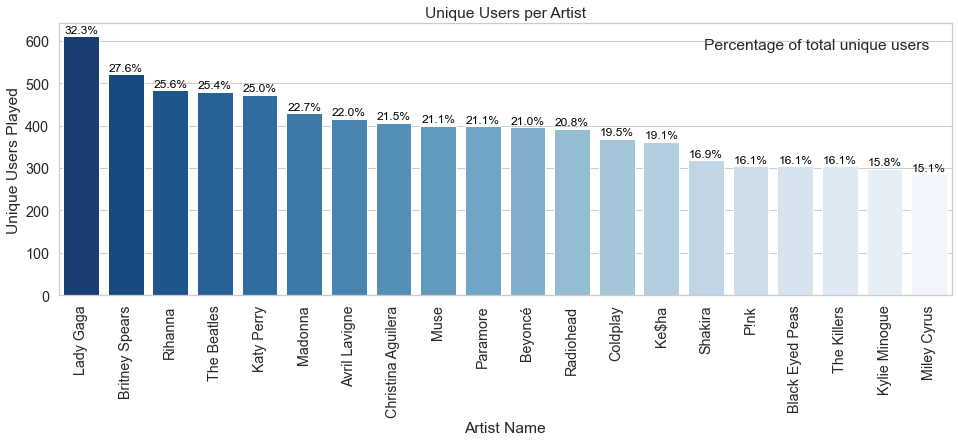

In [60]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = df.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

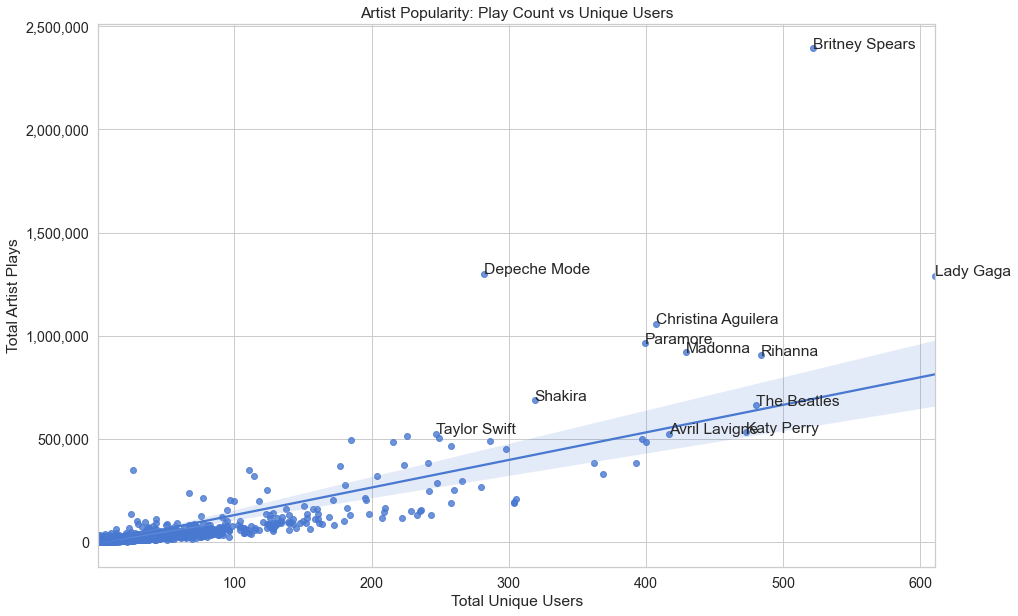

In [61]:
top_artists = artist_rank.sort_values(['totalArtistPlays'],ascending=False).index[:12]

x = artist_rank.totalUniqueUsers
y = artist_rank.totalArtistPlays
labels = artist_rank.index

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

In [62]:
user_artist_plays.head(1)

,userID,artistID,weight
0,2,51,13883


In [63]:
user_artist_plays.groupby('userID')['weight'].count().reset_index().sort_values('weight', ascending=True)[:-10]


,userID,weight
1878,2085,1
1187,1307,1
1562,1731,1
1584,1758,1
571,615,1
...,...,...
642,690,50
640,688,50
639,687,50
638,686,50


## Ejercicio 2 - Sistema de Recomendación

### Ejercicio 2a - Filtrados Colaborativos

Esta parte del ejercicio es obligatoria para quienes quieran aprobar la parte introductoria de la materia (i.e. los contenidos que se ven en las dos primeras clases), quienes estén realizando la materia completa pueden optar por saltearse este ejercicio (aunque es recomendable pensarlo) y pasar directamente al [Ejercicio 2b](#Ejercicio-2b---Sistemas-de-Recomendación-Avanzados). Deberán realizar un sistema de filtrados colaborativos basado en [Surpr!se](http://surpriselib.com/), a partir de los datos que proporciona `LastFM`, en especial el archivo `user_artists.dat`. Tener en cuenta los siguientes pasos:

1. **Desarrollo de la matriz de Usuario-Contenido:** A partir del conjunto de datos deberán generar una matriz de usuario-contenido. Tener en cuenta que los ratings son implícitos, puesto que se dan a partir de la cantidad de veces que un usuario escuchó a determinado artista.
2. **Entrenamiento del algoritmo de recomendación**: Utilizando las herramientas brindadas por [Surpr!se](http://surpriselib.com/), entrenen varios modelos (al menos 3) de sistemas de recomendación basados en filtrado colaborativo a partir de su matriz de usuario-contenido. Recuerden tener en cuenta lo aprendido en la diplomatura a la hora de evaluar y validar el modelo. Si necesitan inspiración, les recomendamos revisar [este notebook con información de como entrenar un sistema de recomendación con Surpr!se](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb).
3. **Sistema de recomendación**: A partir del mejor modelo de recomendación que haya surgido del caso anterior, y utilizando los datos del archivo `artist.dat`, armar un sistema de recomendación sencillo que, dado un nombre de un artista, devuelva el top 10 de artistas más similares. La idea es que el sistema tome el nombre de un artista y devuelva el nombre de otros artistas (no simplemente tomar y devolver IDs). Se recomienda [revisar este notebook para inspiración (ver el paso número 5)](https://github.com/topspinj/pydata-workshop/blob/master/tutorial.ipynb).

In [64]:
df1 = user_artist_plays
df1.sample(4)

,userID,artistID,weight
64853,1461,318,150
16196,350,55,10439
54106,1205,13103,1
47385,1052,12012,187


In [65]:
min_artist_ratings = 50
filter_artist = df1['weight'].value_counts() > min_artist_ratings
filter_artist = filter_artist[filter_artist].index.tolist()

min_user_ratings = 15
filter_users = df1['userID'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = df1[(df1['weight'].isin(filter_artist)) & (df['userID'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(df1.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(92834, 3)
The new data frame shape:	(64922, 3)


In [66]:
#df1['ratio'] = df1.groupby('userID')[['weight']].apply(lambda x: (x-x.min())/(x.max()-x.min())).fillna(0.01)


In [67]:
#df1['ratio'] = round(df1['ratio'], 2)
#df1 = df1.drop(columns=['weight'])
#df1.head()

#### Matriz de Usuario-Contenido

In [68]:

# convert the dataframe into a pivot table
#"df1 = df.pivot(index='userID', columns='artistID', values='weight').fillna(0)

# obtain a sparse matrix
#"matrix = csr_matrix(df1.values)

In [103]:
#ArtistasRatings = df1.pivot_table(index=['userID'],columns=['artistID'],values='ratio').fillna(0)

ArtistasRatings = df_new.pivot_table(index=['userID'],columns=['artistID'],values='weight').fillna(0)
ArtistasRatings.head(20)

artistID,1,2,3,4,5,6,7,8,9,10,...,18729,18730,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Entrenamiento del algoritmo de recomendación

In [104]:
#reader = Reader(rating_scale=(df1.ratio.min(), df1.ratio.max()))
reader = Reader(rating_scale=(df_new.weight.min(), df_new.weight.max()))

#data = Dataset.load_from_df(df1[["userID", "artistID", "ratio"]], reader)
data = Dataset.load_from_df(df_new[["userID", "artistID", "weight"]], reader)



In [126]:
ratings_train, ratings_test = train_test_split(data, test_size=0.2)
model = KNNWithMeans(k=5).fit(ratings_train)
predictions = model.test(ratings_test)
print("RMSE on test: {:.4f}".format(rmse(predictions, verbose=False)))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE on test: 113.4762


In [127]:
model = KNNWithMeans(k=5, verbose=False)
cross_validated_metrics = cross_validate(model, data , measures=['RMSE'], cv=3, verbose=True)

Evaluating RMSE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    115.0883116.0227115.2943115.46840.4008  
Fit time          0.44    0.46    0.46    0.45    0.01    
Test time         1.99    1.85    1.82    1.89    0.07    


In [131]:
model2 =BaselineOnly()
cross_validated_metrics2 = cross_validate(model2, data, measures=['RMSE'], cv=3, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE of algorithm BaselineOnly on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    99.5507 100.349798.8942 99.5982 0.5952  
Fit time          0.21    0.23    0.28    0.24    0.03    
Test time         0.41    0.23    0.26    0.30    0.08    


In [105]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=True)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    449.7597449.7024450.9723450.14480.5856  
Fit time          5.34    5.48    5.42    5.41    0.06    
Test time         0.36    0.37    0.34    0.35    0.01    
Evaluating RMSE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    451.6515449.5065449.3489450.16901.0503  
Fit time          47.80   48.75   48.09   48.21   0.40    
Test time         1.75    1.72    1.84    1.77    0.06    
Evaluating RMSE of algorithm SlopeOne on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    110.9163109.7747109.7961110.16240.5332  
Fit time          6.40    11.71   7.51    8.54    2.29    
Test time         0.94    1.28    4.02    2.08    1.38    
Evaluating RMSE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    214.6847216.

In [106]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')


In [107]:
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,99.640647,0.224545,0.230163
SlopeOne,110.162356,8.540156,2.080142
CoClustering,110.795644,5.429196,0.347594
KNNBaseline,112.774989,0.607978,3.416636
KNNWithZScore,113.962065,0.592777,3.232002
KNNWithMeans,114.043840,0.455503,2.835712
KNNBasic,143.306226,0.388550,2.574997
NormalPredictor,188.717883,0.165033,0.425318
NMF,215.760752,9.004921,0.775324


In [108]:
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([97.26999923, 98.4101334 , 98.68702462]),
 'fit_time': (0.13219690322875977, 0.14648938179016113, 0.15085983276367188),
 'test_time': (0.2861671447753906, 0.2463672161102295, 0.4122035503387451)}

In [109]:

trainset, testset = train_test_split(data, test_size=0.25)
algo = BaselineOnly(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 97.4768


97.4767993279889

In [110]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)


In [111]:
df.head(1)

,uid,iid,rui,est,details,Iu,Ui,err
0,1261,1764,331.0,243.514947,{'was_impossible': False},27,12,87.485053


In [112]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [113]:
best_predictions


,uid,iid,rui,est,details,Iu,Ui,err
7796,1890,9788,185.0,184.998267,{'was_impossible': False},35,0,0.001733
8219,71,2002,165.0,164.997266,{'was_impossible': False},32,1,0.002734
262,1799,531,174.0,174.006071,{'was_impossible': False},23,45,0.006071
12621,887,10830,154.0,154.016975,{'was_impossible': False},36,0,0.016975
4229,996,11652,130.0,129.973322,{'was_impossible': False},40,1,0.026678
14912,1072,3332,274.0,273.966716,{'was_impossible': False},24,11,0.033284
10405,176,3771,223.0,223.045465,{'was_impossible': False},19,3,0.045465
3675,1705,16154,314.0,314.047126,{'was_impossible': False},21,0,0.047126
1260,1119,12415,60.0,59.951136,{'was_impossible': False},38,0,0.048864
15711,1915,4385,63.0,62.949336,{'was_impossible': False},40,9,0.050664


In [114]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
4440,1081,225,495.0,93.996596,{'was_impossible': False},33,55,401.003404
3359,1375,2572,580.0,174.547801,{'was_impossible': False},29,3,405.452199
14792,1207,13126,559.0,150.029505,{'was_impossible': False},36,0,408.970495
5629,400,1458,580.0,165.912217,{'was_impossible': False},34,21,414.087783
3405,142,3276,557.0,132.039117,{'was_impossible': False},35,0,424.960883
11523,1771,257,615.0,187.624528,{'was_impossible': False},34,98,427.375472
3280,745,4687,615.0,180.417177,{'was_impossible': False},3,1,434.582823
9659,376,3470,570.0,129.929011,{'was_impossible': False},27,21,440.070989
9103,98,306,559.0,103.874368,{'was_impossible': False},40,162,455.125632
7118,2044,18371,570.0,95.283832,{'was_impossible': False},39,0,474.716168


#### Sistema de recomendación:

In [116]:
df2 = user_artist_plays
df2.head(2)

,userID,artistID,weight
0,2,51,13883
1,2,52,11690


In [117]:
from scipy.sparse import csr_matrix

def create_X(df2):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df2['userID'].nunique()
    N = df2['artistID'].nunique()

    user_mapper = dict(zip(np.unique(df2["userID"]), list(range(M))))
    artist_mapper = dict(zip(np.unique(df2["artistID"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df2["userID"])))
    artist_inv_mapper = dict(zip(list(range(N)), np.unique(df2["artistID"])))
    
    user_index = [user_mapper[i] for i in df2['userID']]
    item_index = [artist_mapper[i] for i in df2['artistID']]

    X = csr_matrix((df2["weight"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, artist_mapper, user_inv_mapper, artist_inv_mapper

X, user_mapper, artist_mapper, user_inv_mapper, artist_inv_mapper = create_X(df2)

In [118]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 0.28%


In [119]:
n_ratings_per_user = X.getnnz(axis=1)

print(f"Most active user rated {n_ratings_per_user.max()} artist.")
print(f"Least active user rated {n_ratings_per_user.min()} artist.")

Most active user rated 50 artist.
Least active user rated 1 artist.


In [120]:
n_ratings_per_artist = X.getnnz(axis=0)

print(f"Most rated artist has {n_ratings_per_artist.max()} ratings.")
print(f"Least rated artist has {n_ratings_per_artist.min()} ratings.")

Most rated artist has 611 ratings.
Least rated artist has 1 ratings.


C:\Users\CristianSalgado\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


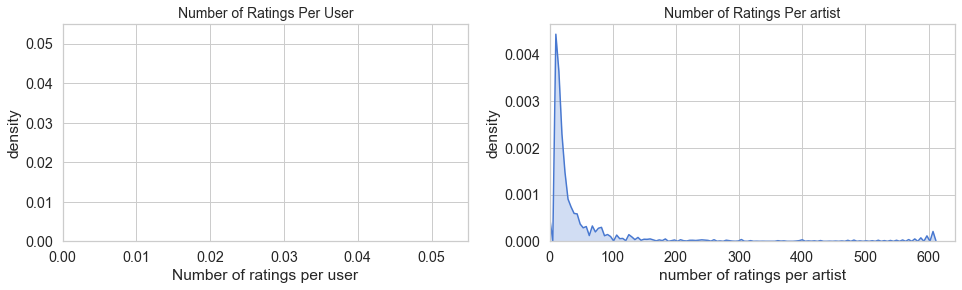

In [121]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("Number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_artist, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per artist", fontsize=14)
plt.xlabel("number of ratings per artist")
plt.ylabel("density")
plt.show()

In [122]:
sum_ratings_per_artist = X.sum(axis=0)
mean_rating_per_artist = sum_ratings_per_artist/n_ratings_per_artist

In [123]:
X_mean_artist = np.tile(mean_rating_per_artist, (X.shape[0],1))

In [124]:
X_mean_artist.shape

(1892, 17632)

In [125]:
X_norm = X - csr_matrix(X_mean_artist)

In [96]:
from sklearn.neighbors import NearestNeighbors

def find_similar_artist(artist_id, X, artist_mapper, artist_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given movie id.
    
    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations
    
    Output: returns list of k similar movie ID's
    """
    X = X.T
    neighbour_ids = []
    
    artist_ind = artist_mapper[artist_id]
    artist_vec = X[artist_ind]
    if isinstance(artist_vec, (np.ndarray)):
        artist_vec = artist_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    
   # model2 =BaselineOnly()
   # cross_validated_metrics2 = cross_validate(model2, data, measures=['RMSE'], cv=3, verbose=True)
    
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(artist_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(artist_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [97]:
similar_artist = find_similar_artist(1, X_norm,artist_mapper, artist_inv_mapper, k=10)
similar_artist

[5077, 5085, 5086, 5090, 5091, 5092, 5095, 5096, 5078]

In [99]:
artist_data.head(1)

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg


In [101]:
artist_titles = dict(zip(artist_data['id'], artist_data['name']))

artist_id = 2

similar_artist = artistfind_similar_artist(artist_id, X_norm, artist_mapper, artist_inv_mapper, metric='cosine', k=10)
artist_title = artist_titles[artist_id]

print(f"Because you watched {artist_title}:")
for i in similar_artist:
    print(artist_titles[i])

Because you watched Diary of Dreams:
Scream Silence
Lost Signal
Arcana
Aesthetic Perfection
Kirlian Camera
All My Faith Lost ...
Fantazja
Alien Produkt
Acylum


In [102]:
artist_id = 3

similar_artist = find_similar_artist(artist_id, X_norm, artist_mapper, artist_inv_mapper, metric='euclidean', k=10)
artist_title = artist_titles[artist_id]

print(f"Because you watched {artist_title}:")
for i in similar_artist:
    print(artist_titles[i])

Because you watched Carpathian Forest:
Les Chants de Nihil
Skepticism
Dark Funeral
Lô Borges
Lee Hazlewood
Mortification
Impaled
Ulises Hadjis
La Nueva Banda Timbiriche


### Ejercicio 2b - Sistemas de Recomendación Avanzados

Este ejercicio lo deberán completar quienes hayan realizado ambas partes de la materia pues requiere de los conocimientos adquiridos en las segundas dos clases. En este caso, utilizarán no sólo la información de la matriz de usuario-contenido, sino que deberán hacer uso de otra información para poder lidiar con el problema del "Cold Start", i.e. que es lo que ocurre cuando tengo nuevos usuarios o artistas. Tener en cuenta los siguientes pasos:
1. **Evaluación sobre cold start**: Para evaluar como funciona el sistema con el problema del "cold start", deberán tomar ciertos artistas y "dejarlos fuera", i.e. remover cualquier participación del artista en el sistema. Esos serán los artistas que se evaluarán como "cold start".
2. **Vectores de contenido**: Deberán generar vectores de contenido para los artistas, basados en los tags que los usuarios les dan (ver los archivos `user_taggedartists.dat` y `tags.dat`).
3. **Sistema de recomendación**: Deberán crear un sistema de recomendación que tomará como parámetros la información del artista (i.e. nombre y tags). Con dicha información, deberán disponer de un sistema de recomendación híbrido (utilizando cualquiera de las técnicas vistas en clase) que devuelva artistas similares. El sistema de recomendación deberá utilizar toda la información proporcionada para dar una mejor respuesta.
4. **Evaluación del sistema**: Deberán evaluar "a mano" el sistema sobre artistas que conozca y artistas que no conozca (i.e. que fueron dejados afuera), y hacer un análisis de lo que el sistema está devolviendo.

In [ ]:
# Completar...